# Predicting House Prices of Washington Using Machine Learning

by Hanna Seyoum

## Problem Statement

House prices generally tend to go up with time, gradually, with some probability of crashing. With price increase, or decrease, many people either looking to buy or sell are affected. The goal is to predict current values of the houses so that buyers and sellers can make informed decisions.

## The Data

The data contains houses from the state of Washington with 18 attributes such as number of bedrooms and bathrooms, square footage of the entire house and of the lot, house address, etc. The dataset was acquired from Kaggle.

https://www.kaggle.com/shree1992/housedata

## Methodology

I have treated this as a supervised learning regression problem.

* Acquired dataset from Kaggle  
* Applied data wrangling & cleaning for feautre engineering and selection, and to handle missing values and outliers 
* Exploratory Data Analysis and Visualizations to find patterns and insights w.r.t various features in housing data  
* Hypothesis testing leveraging inferential statistics  
* Predictive modeling for house prices leveraging linear regression, ridge regression, and random forest regression. 

### Libraries

pandas for:  
    
    data loading, wrangling, cleaning, and manipulation  
    feature selection and engineering  
    descriptive statistics


numpy for:

    generating an array of values
    array sorting and manipulation
    

matplotlib and seaborn for:

    data visualization
    

scikit-learn for:

    data preprocessing
    regression and ensemble models
    cross-validation
    model selection
    model performance / metrics

### Data Wrangling & Cleaning

The data is a CSV file which I uploaded onto pandas as a data frame. A combination of feature engineering and selection was used. There were no NaNs, but instead there were 0s that indicated missing values in some entries.

**Cleaning steps**

* Used a combination of **feature engineering** & **feature selection**. The more the features the better, to a certain extent (i.e., curse of dimensionality), therefore I kept all features except for `statezip`, which I deleted after splitting it into `state` and `zipcode` features, `date`, `year`, `country`, `state`, and `street`.

* Created `month` & `year` features from the `date` column, and created `renovation_age` and `house_age` features.

* Created a `total_sqft` feature by summing `sqft_living` and `sqft_lot`.

* Changed the data types of `waterfront` & `condition` features from `int` to `category` because they both have values `0` & `1` where 1 means yes & 0 means no.

* Created features `price_is0`, `renov_date_is0`, and `yr_built_is0` with boolean arrays where it's 1 for all 0 values and 0 for the rest.

**Handling missing/zero values**

* Found 2 houses with 0 bedrooms & 0 bathrooms that were priced over \$1 million. It was clear that they were erroneous data. Therefore I replaced the bedroom & bathroom values of both houses with the mean bedroom & bathroom values.

* The `yr_renovated` column is a numeric column with years of when the houses were last renovated, & 59.5\% of the rows have 0s as their value. I was not sure if the 0 meant that a house was never renovated, or if the renovation date was missing. I considered removing the column since 59.5\% of the rows are zeros, but instead of deleting the column, I added a boolean array column with 1s for all the houses that have a 0, and 0s for all the houses that have a renovation year listed.

* 1.1\% of the `Price` column has houses with 0 values. It is unlikely that the houses were worth \$0, so I did the same as with the `yr_renovated` column and added a boolean array column. I also created a new dataframe with these houses removed to compare it's models to the ones with \$0 house price included. There was a slight improvement in the models with the 0s removed. However, I don't think this improvement in model performance is worth removing 1.1\% of the data.

**Outliers**

* Found two 3-bedroom houses with prices over \$10 million. To check if they were outliers or possibly erroneous, I plotted a linear regression line of `price` & `sqft_living` to check if the prices are high due to their square footage. The plot showed that they were erroneous entries, so I created a new dataframe with both houses removed and compared it's model performance with the original dataframe's model. There was significant improvement in model performance. Therefore I've conducted remaining analysis with the dataframe exlcuding these 2 houses.
* Found outliers in `sqft_lot` where the lot sizes were significantly larger than than of other homes. Therefore I removed houses with lot size of over 600,000 sqft.  

The following plots will show the `price` and `sqft_lot` outliers.

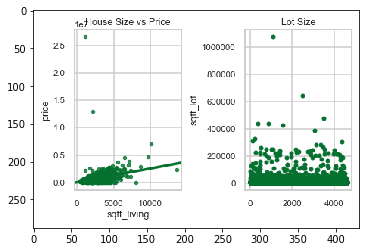

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread("outliers.png")
imgplot = plt.imshow(img)
plt.show()

### Exploratory Data Analysis & Statistical Analysis Plots

**Feature Observation**

Some assumptions:

    Houses with more bedrooms will be worth more
    Houses with more bathrooms will be worth more
    Houses in bad condition will be worth less
    Houses with higher square footage will be worth more
    Houses with a waterfront will be worth more

* Plotted a heatmap of all the features and target variable to get an idea of their relationships.
* Plotted scatter plots of `price` against # of bedrooms, house size, and house condition. These plots showed a positive linear relationship between `sqft_living` & `price`, a non linear (polynomial) relationship between `bedrooms` & `price`, and the `condition` plot showed that houses in poor condition are worth much less than houses in moderate and good condition. Also, majority of the houses are in moderate condition, and the plot has a slightly parabolic shape.
* Plotted a barplot of `waterfront` vs `price` which showed that houses with waterfronts are worth more.
* Plotted a line plot of `yr_built` and `price`. This plot shows that house prices are higher with houses that are very old and also new. Old houses could be priced higher due to their historical value. 
* Plot of mean & median prices per bedrooms. Noticed a slight difference between the two plots, with mean prices being slightly larger than median prices. This could be due to some price outliers.
* Plot of mean & median house sizes per number of bedrooms. We see a strong positive linear relationship between `bedrooms` and `price`, and the mean & median plots are very similar.
* An ecdf plot of house prices by each month (may, june, & july) shows that house prices remained about the same in each month.

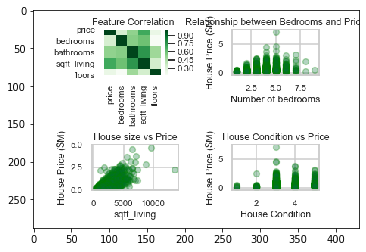

In [3]:
img=mpimg.imread("some_visualization.png")
imgplot = plt.imshow(img)
plt.show()

**Feature Importance**

The heatmap gives us a visual representation of the features correlation with each other and with the target variable `price`. In addition to the heatmap, the coefficient of each feature tells us how siginificant each feature is in regards to its predictability of the target variable, i.e., the relationship of each feature with price.

I go into more detail when discussing the coefficients further down.

### Model Fitting

3 algorithms were used: Linear Regression, Ridge Regression & Random Forrest.

**Choosing hyperparameters**

**Ridge Regression**   
The hyperparameter that I tuned for Ridge is alpha. I tried values 0.0001, 0.001, 0.01, 0.1, 1, 10, and found alpha=1 to be the best parameter.

**Random Forest**   
The hyperparameters that I tuned for Random Forest are n_estimators & max_depth, with best values of None & 100 respectively. 

With the above hyperparameters, I proceceded to fit several models using the 3 algorithims, using data with outlier prices removed, data with price outliers & zero prices removed, and using data with both included. Also fitted some models with parabolic transformations of the `bedrooms` feature since it had a parabolic shape. Overall, the best model was the Random Forest Regressor that was fitted with data excluding houses with erroneous prices.

## Results

Our initial assumptions of the features are confirmed: 

`waterfront`, `sqft_living`, and `bathrooms` have a positive linear relationship with `price`. An unexpected result was `bedrooms` having a negative relationship with price. I talk about this in more detail further down when discussing the coefficients.

$R^2$ represents the proportion of variance of the target variable `price` that has been explained by the features in the model. The higher the $R^2$ value the better. Random Forest resulted in the highest $R^2$ value of 65\%, which is better than average, but needs to be improved.

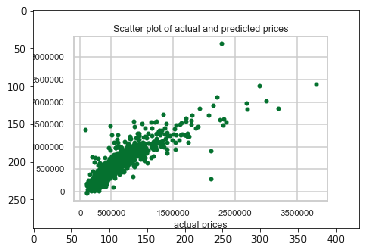

In [4]:
# scatter plot of actual price and predicted price of the ridge model
img=mpimg.imread("scatter_true_pred.png")
imgplot = plt.imshow(img)
plt.show()

We see in the above plot that the predicted prices are somewhat close to the actual prices, but not very close. The best case scenario would be for the scatter plots to follow a perfectly straight diagonal line, indicating that our model perfectly predicted the house prices. This is one visual indication that a linear regression model does not best fit this data. 

Let's take a look at a histogram of the residuals of the best performing linear regression model.

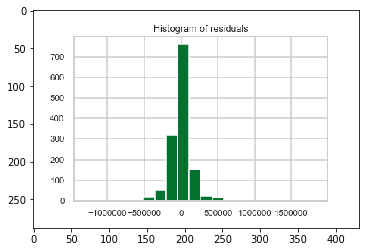

In [5]:
img=mpimg.imread("hist_resid.png")
imgplot = plt.imshow(img)
plt.show()

Ideally a residual histogram follows a normal distribution, and that tells us that we've chosen an appropriate model type. However, the above plot does not closely follow a normal distribution, which is another indication that either my models need improvemnt, or a regression model is not best fit for my data.

#### Accuracy Score Table -- models include home addresses

Below is an accuracy score table of all the models tested. We can see that Random Forest performed the best. 
The train & test scores are $R^2$ values and the train & test errors are the RMSE values. I chose RMSE instead of MSE since RMSE gives us the price value, while MSE gives us the price squared.

In [6]:
import pandas as pd
#with_address table

w_address = pd.read_csv("with_address.csv")
w_address.sort_values("test_score", ascending=False)

,models,test_score,train_score,test_error,train_error,price outs removed,description,features
15,RidgeRegression,0.766,0.895,4866.0,0.0,yes,df2 parabolic transformation,"all except price, date, year, street, city, state"
14,RidgeRegression,0.766,0.894,4759.0,0.0,yes,df2 zero prices removed,"all except price, date, year, street, city, state"
10,RidgeRegression,0.766,0.894,4759.0,0.0,yes,zero prices removed,"all except price, date, year, street, city, state"
11,RidgeRegression,0.766,0.895,4866.0,0.0,yes,parabolic transformation,"all except price, date, year, street, city, state"
17,RandomForest,0.745,0.947,2825.0,2565.0,yes,no transformations,"all except price, date, year, street, city, state"
21,RandomForest,0.731,0.947,3668.0,2823.0,yes,df2 no transformations,"all except price, date, year, street, city, state"
23,RandomForest,0.719,0.953,12669.0,2873.0,yes,df2 parabolic transformation,"all except price, date, year, street, city, state"
19,RandomForest,0.718,0.954,12482.0,3169.0,yes,parabolic transformation,"all except price, date, year, street, city, state"
18,RandomForest,0.717,0.955,13568.0,3284.0,yes,zero prices removed,"all except price, date, year, street, city, state"
22,RandomForest,0.708,0.955,12563.0,3135.0,yes,df2 zero prices removed,"all except price, date, year, street, city, state"


Model description:
* Each model contains all features except for `price`, `date`, `year`, `street`, `city`, and `state`
* Models described as having no transformations are those which did not have their `bedrooms` feature undergo parabolic transformation.
* Models with zero prices removed are those with zero values in the `price` feature and price outliers removed.
* Models with parabolic transformation are based on data with price outliers and zero prices removed, and have their `bedrooms` feature transformed.

From the table above we can see that the best model is the Ridge Regression model with 76.6% accuracy. In fact there are 4 Ridge models with the same 76.6% accuracy, with the Random Forest model being the next best.

The hyperparameter of the ridge regression model `alpha` was chosen to be 1, and the hyperparameters of the Random Forest model were chosen to be None and 200 for `max_depth` and `n_estimators` respectively.

**Analysing the coefficients**

Let's take a look at the coefficients of the best performing ridge regression model that has its `bedrooms` feature transformed.

In [7]:
w_address_coefs = pd.read_csv("w_address_coefs.csv")
w_address_coefs.columns = ["features", "coef"]
w_address_coefs_top = w_address_coefs.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14, 2757], :]
w_address_coefs_top.sort_values(by=["coef"], ascending=False)

,features,coef
5,waterfront,533796.510797
14,renov_date_is0,59524.707516
6,view,58641.431715
7,condition,25971.330640
1,bathrooms,16351.327832
2,sqft_living,98.811006
8,sqft_above,96.505475
12,total_sqft,49.402657
11,yr_renovated,34.537373
9,sqft_basement,2.306068


The coefficient of a term represents the change in the mean response for one unit of change in that term. If the coefficient is positive, as the term increases, the mean value of the response increases. If the coefficient is negative, as the term increases, the mean value of the response decreases. So for example we see that the coefficient of `sqft_living` is 98.8. This means that for every 1 sqft increase on a house, the price would increase by \\$99.

I was surprised to see `bedrooms` have a negative coeficient, since my assumption was that when the number of bedrooms increase, so does the price. However, we saw previously with a `bedrooms` and `price` scatterplot that price increases with number of bedrooms only for homes with up to 5 bedrooms. The price then starts to decrease for homes with 6 bedrooms or more.  
Notice also `bedrooms_squared` has a positive coeficient. This feature is `bedrooms` with a parabolic transformation. Since this feature has adjusted for `bedrooms` shape, it makes sense that it is positive.

Notice also that `floors` has a negative coefficient. 

Not only is the coefficient of `sqft_lot` negative, but it's also a small number, indicating that its affect on  price is miniscule.

Below I will be printing out the most significant positive and negative coefficients.

In [8]:
w_address_coefs.sort_values(by=["coef"])

,features,coef
2210,street_name_se 22nd st,-7.320518e+05
406,street_name_175th pl ne,-5.197417e+05
1003,street_name_79th pl ne,-5.139810e+05
2476,street_name_shoreland dr s,-3.527485e+05
1719,street_name_ne 70th st,-3.048568e+05
...,...,...
985,street_name_6th st w,6.298176e+05
2685,street_name_warren ave n,6.581901e+05
1047,street_name_91st ave ne,7.860069e+05
1126,street_name_butterworth rd,8.000799e+05


By printing out the most significant positive and negative coefficients of the ridge regression, we see that they are all `street_address` features, which was alarming to me. So, I created a new dataframe with the exact same homes and features, except with `street_address` removed. I did this to have a better understanding of the coefficients of other features without the stree_address overshadowing them.

#### Accuracy Score Table -- models exclude home addresses

In [9]:
# without_address table
wo_address = pd.read_csv("without_address.csv")
wo_address.sort_values("test_score", ascending=False).head(15)

,models,test_score,train_score,test_error,train_error,price outs removed,description,features
14,RidgeRegression,0.770,0.766,3722.0,0.0,yes,df2 zero prices removed,"all except price, date, year, street, city, state"
10,RidgeRegression,0.770,0.766,3722.0,0.0,yes,zero prices removed,"all except price, date, year, street, city, state"
11,RidgeRegression,0.770,0.767,3794.0,0.0,yes,parabolic transformation,"all except price, date, year, street, city, state"
15,RidgeRegression,0.770,0.767,3794.0,0.0,yes,df2 parabolic transformation,"all except price, date, year, street, city, state"
2,LinearRegression,0.763,0.767,2885.0,0.0,yes,zero prices removed,"all except price, date, year, street, city, state"
6,LinearRegression,0.763,0.767,2885.0,0.0,yes,df2 zero prices removed,"all except price, date, year, street, city, state"
17,RandomForest,0.723,0.952,6239.0,263.0,yes,no transformations,"all except price, date, year, street, city, state"
21,RandomForest,0.719,0.952,5772.0,215.0,yes,df2 no transformations,"all except price, date, year, street, city, state"
19,RandomForest,0.713,0.954,6443.0,1241.0,yes,parabolic transformation,"all except price, date, year, street, city, state"
23,RandomForest,0.710,0.958,5995.0,779.0,yes,df2 parabolic transformation,"all except price, date, year, street, city, state"


When building the above models, the `street_address` feature was excluded. We can see that the Ridge Regression models performed best in both cases where addresses were included and excluded. We can also see that the models excluding street addresses performed better than those including them. Therefore, I used the best performing model in the above table to conduct my analyses. There are 4 ridge regression models with the same and best scores, 0.77. I will go with `df2` with a parabolic transformation on `bedrooms`.

The hyperparameter of the ridge regression model `alpha` was chosen to be 1, same as before. The hyperparameters of the Random Forest model were chosen to be None and 100 for `max_depth` and `n_estimators` respectively.

**Analysing the coefficients**

In [10]:
# without_address coefs
wo_address_coefs = pd.read_csv("wo_address_coefs.csv")
wo_address_coefs.columns = ["features", "coef"]
wo_address_coefs = wo_address_coefs.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14, 139], :]
wo_address_coefs.sort_values(by=["coef"], ascending=False)

,features,coef
5,waterfront,569225.065922
14,renov_date_is0,78167.889271
6,view,61242.096351
7,condition,30302.040770
1,bathrooms,23053.257624
2,sqft_living,102.006751
8,sqft_above,99.737997
12,total_sqft,51.015755
11,yr_renovated,45.457712
9,sqft_basement,2.268826


**In-depth Analysis**

The following analysis is based on my 95% confidence that the error in the home price predictions is between -\\$7,444 and \\$7,444:

If I've predicted a house to be $\$$200,000 and someone were to buy the house at that price, the worst loss would be \\$7,444 and the highest gain would be \\$7,444. That is, the least the house would actually be worth is \\$192,556 (200,000-7,444), and the most the house would be worth is \\$207,444 (200,000+7,444).

Let's say my boss wants to buy a house at below my estimate in the hopes of flipping it, i.e., selling the house at around double the price at which he acquired it. With a house that I have estimated to be \\$200,000, if he purchases it at \\$100,000 for example, 3 things can happen:

1. My estimation is correct and he would make a profit of \\$100,000 by selling it for \\$200,000.  
2. The house is actually worth \\$192,556 and he ends up making a profit of \\$92,556.  
3. The house is actually worth \\$207,444 and he ends up buying \\$107,000 below the house value, resulting in a 207\%  profit if he were to sell it for \\$207,444.

**What happens if my boss purchases 100 homes at my predicted price?**

If my boss was to buy 100 homes at my predicted price and sell them at their true price, I can be 95\% confident that the most she would lose is \\$33,040 and the most she would gain is \\$40,089.

**What happens if my boss purchases 100 homes \\$1000 below my predicted prices?**

If my boss was to buy 100 homes at \\$1000 less than my predicted price and sell them at their true price, I can be 95% confident that the most she would lose is \\$32,531 and the most she would gain is \\$41,209 95% of the time.

So if she purchases 100 homes at $1000 below my predicted price, the most she would gain increases by \\$1,120, and the most she would lose decreases by \\$509.
This is clearly a better option, and since finding homes that are selling \\$1000 below their true value is practical, I would recommend this plan to my boss.

Below are histograms of both the distribution of purchasing 100 homes at my predicted prices, and purchasing 100 homes at $1000 less than my predicted prices.

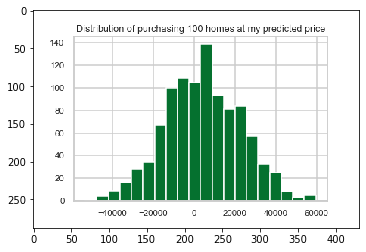

In [11]:
# purchasing 100 homes at predicted price
img=mpimg.imread("hist_100_homes.png")
imgplot = plt.imshow(img)
plt.show()

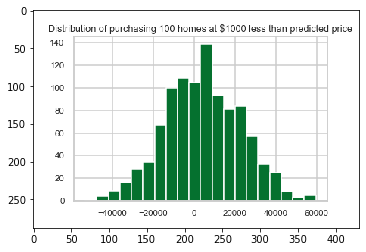

In [12]:
# purchasing 100 homes at $1000 less than predicted price
img=mpimg.imread("hist_1000_homes.png")
imgplot = plt.imshow(img)
plt.show()

Both histograms show that their mode is shifted to the positive, which means we're in profit. I conducted this experiment a few more times to make sure the shape is real.

**Other experiments:**
* experiments with other models
* experiemnts with predicted prices reduced by \\$5,000, \\$10,000, \\$50,000

When running experiments using my other models, the ridge regression model resulted in the most profit, which was expected since the model had the least error in its prediction.

I ran experiments with \\$5,000, \\$10,000, \\$50,000 deducted from the predicted prices. 
This means that my boss would purchase 100 homes with \\$5,000, \\$10,000, and \\$50,000 below my predicted prices. 
The result was that these 3 experiments produced better profits than the scenario where my boss would purchase homes at \\$1000 less than my predicted prices. However, finding 100 houses at those reduced prices would be difficult. Therefore, I would reccomend focusing on finding homes with the \\$1000 reductions.

## Model Limitations

Linear regression: assumes a straight line relationship between the features and target variable. Though many of my features have a linear relationship with price, there are some which do not. House prices do increase as square footage and number of bedrooms increase, but once the square footage reaches a certain point, and once the houses get up to 6 bedrooms, the house prices start to decrease. Also, there aren't many houses with over 6 bedrooms, so the decrease in average price for houses with over 6 bedrooms could be due to lack of sufficient data.

Ridge regression: same as linear regression in that it assumes a linear relationship between the feature and target variables. 

Random forest regression:
Random Forest can’t extrapolate. It can only make a prediction that is an average of previously observed labels. Therefore, the range of predictions a Random Forest can make is bound by the highest and lowest labels in the training data.

## Conclusion

Out of all the models, ridge regression yielded the best prediction accuracy of around 77%, with linear regression following with 76.3%, and Random Forest coming in third with 72.3% accuracy score. One explanation of the ridge regression's performance and also linear regression's is the data having many features that are linearly correlated to the target variable `price`. Though random forest did not perform as well as ridge and linear regression, it still managed to perform well due to its bagging technique where it takes bootstrap aggregates of decision tree models, minimizing  bias and variance in the model and resulting in a more accurate and universal model than decision tree modeling for example.

**Recommendations:**
Based on the coefficients I would focus on improving the condition of the homes and if possible, adding a bathroom to see a better return on the investment when trying to sell homes. `watefront` and `view` have significant effect on price, however they are not something that could simply be added to an existing home. Improving on `condition` and `bathroom` however is doable. As we've seen above, with each increase in the condition of the home, the price goes up by \\$30,302 and with each increase in the number of bathrooms, the price increases by \\$23,053. 

## Next Steps

To improve the prediction accuracy of my model I will do the following:
* Scrape Washington state data such as city population, salary, and schools and include them as features to gain more insight
* Transform more features when modeling

## Code

## Data Preparation

In [13]:
# import necessary modules/libraries

import numpy as  np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import pearsonr

from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.7)
sns.set_palette("Greens_r")
#set_palette("Set1", 8, .75) # makes plot lines red

# Ignore  the warnings
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

from sklearn.preprocessing import Imputer # to impute missing data

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Feature Engineering

In [14]:
df = pd.read_csv("house_price_prediction.csv") # read the data

df["date"] = pd.to_datetime(df['date']) # change date col to datetime
df["month"] = df['date'].dt.month # creating month feature
df["year"] = df['date'].dt.year  # all 2014 so can drop
df[["waterfront", "condition"]] = df[["waterfront", "condition"]].astype("category") # change data types to categorical
df["state"] = df['statezip'].apply(lambda x: x.split(' ')[0]) # split statezip into state & zipcode
df["zipcode"] = df['statezip'].apply(lambda x: int(x.split(' ')[1]))
df["total_sqft"] = df.sqft_living + df.sqft_lot # creating total_sqft feature: sqft_above + sqft_lot
#df["street_name"] = df['street'].str.strip().str.lstrip('-0123456789').str.strip().str.lower()
df["price_is0"] = df['price'] <= 0 # create column of boolean arrays with 1 for price == $0 & 0 for price != $0
df["renov_date_is0"] = df['yr_renovated'] <= 0 # create column of boolean arrays with 1 for yr_renov == 0 & 0 for others

# replacing 0s with the mean bedroom & bathroom values
df["bedrooms"].replace({0: round(df["bedrooms"].mean(), 0)}, inplace=True)
df["bathrooms"].replace({0: round(df["bathrooms"].mean(), 0)}, inplace=True)

In [15]:
# will apply get_dummies to month feature after conducting some statistical analysis such as ecdf plot
df = pd.get_dummies(df, columns=["zipcode", "city"])

**Further feature engineering**

In [16]:
df2 = df.copy()
df2['yr_built_is0'] = df2['yr_built'] <= 0
df2['renovation_age'] = df2['year'] - df2['yr_renovated']
df2['house_age'] = df2['year'] - df2['yr_built']
df2 = df2[df2['sqft_lot'] < 600000]

In [17]:
for c in ['date', 'year', 'statezip', 'country', 'state', 'street']:
    try:
        del df[c], df2[c]
    except KeyError:
        pass

In [18]:
df_no_outs = df[df.price < 10000000].copy() # df with price outliers removed
df_no_zeros = df_no_outs[df_no_outs["price"] != 0].copy() # df with $0 prices removed

df2_no_outs = df[df.price < 10000000].copy() # df2 with price outliers removed
df2_no_zeros = df_no_outs[df_no_outs["price"] != 0].copy() # df2 with $0 prices removed

## Statistical Data Analysis

In [19]:
meanprice_bedrooms = df_no_zeros.groupby('bedrooms')['price'].mean()
medianprice_bedrooms = df_no_zeros.groupby('bedrooms')['price'].median()

meansqft_bedroom = df_no_zeros.groupby("bedrooms")["sqft_living"].mean()
mediansqft_bedroom = df_no_zeros.groupby("bedrooms")["sqft_living"].median()

may_price = df_no_zeros[df_no_zeros.month==5]['price']
june_price = df_no_zeros[df_no_zeros.month==6]['price']
july_price = df_no_zeros[df_no_zeros.month==7]['price']

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)

    x = np.sort(data)

    y = np.arange(1, n+1) / n

    return x, y

# Compute ECDFs
x_5, y_5 = ecdf(may_price)
x_6, y_6 = ecdf(june_price)
x_7, y_7 = ecdf(july_price)

In [20]:
# apply get_dummies to month feature in all the dataframes
df = pd.get_dummies(df, columns=['month'])
df_no_outs = pd.get_dummies(df_no_outs, columns=['month'])
df_no_zeros = pd.get_dummies(df_no_zeros, columns=['month'])
df2 = pd.get_dummies(df2, columns=['month'])
df2_no_outs = pd.get_dummies(df2_no_outs, columns=['month'])
df2_no_zeros = pd.get_dummies(df2_no_zeros, columns=['month'])

### Feature Importance

In [21]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

def feature_importance(X, y, model='reg'):
    score_func = {'reg': f_regression}

    # Score each of the features
    bestfeatures = SelectKBest(score_func=score_func[model], k='all')
    fit = bestfeatures.fit(X, y)

    # Organize and return the scores
    featureScores = pd.DataFrame([X.columns, fit.scores_]).T
    featureScores.columns = ['Feature', 'Score']
    return featureScores.sort_values('Score', ascending=False).set_index('Feature')

talk about the important features..

### Hypothesis Test I

**Ho**: Prices of houses with many bedrooms and a few bedrooms are equal.  
**Ha**: Prices of houses with many bedrooms and a few bedrooms are different.

t-test:
I'll compare 2 groups: one with `bedrooms` greater than or equal to 4, and another with less than 4.

In [22]:
many_bedrooms = df_no_outs[df_no_outs['bedrooms'] >= 4]['price']
few_bedrooms = df_no_outs[df_no_outs['bedrooms'] < 4]['price']
stats.ttest_ind(many_bedrooms, few_bedrooms)

Ttest_indResult(statistic=20.612406446603853, pvalue=2.3169170411918228e-90)

#### Result
**t-stat**: 20.6  
**p-val**: 2.3e-90 < 0.05  
We reject the null hypothesis that houses with many bedrooms are priced around the same as houses with fewer bedrooms.

### Hypothesis Test II

**Ho**: Houses with waterfronts are priced the same as houses without waterfronts.  
**Ha**: Houses with waterfronts are priced differently than houses without waterfronts.

In [23]:
waterfront = df_no_outs[df_no_outs['waterfront'] == 1]['price']
no_waterfront = df_no_outs[df_no_outs['waterfront'] == 0]['price']
stats.ttest_ind(waterfront, no_waterfront)

Ttest_indResult(statistic=14.441521571804724, pvalue=2.8817562762538972e-46)

#### Result
**t-stat**: 14.4  
**p-val**: 2.9e-46 < 0.05  
We reject the null hypothesis that houses with waterfronts are priced the same as houses without waterfronts.

# Data Modeling

## Data Preprocessing

In [24]:
# dataframe with both zero prices and outliers.
X = df.drop(['price'], axis='columns')
y = df["price"]
# splitting data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# dataframe without price outliers
X_no_outs = df_no_outs.drop(['price'], axis='columns')
y_no_outs = df_no_outs["price"]
X_train_no_outs, X_test_no_outs, y_train_no_outs, y_test_no_outs = train_test_split(X_no_outs, y_no_outs, test_size = 0.3, random_state=42)

# dataframe without $0 price values
X_no_zeros = df_no_zeros.drop(['price'], axis='columns')
y_no_zeros = df_no_zeros["price"]
X_train_no_zeros, X_test_no_zeros, y_train_no_zeros, y_test_no_zeros = train_test_split(X_no_zeros, y_no_zeros, test_size = 0.3, random_state=42)

# dataframe with a parabolic transformation on the `bedrooms` feature
X_transformed = df_no_zeros.drop(['price'], axis='columns')
X_transformed['bedrooms_squared'] = X['bedrooms']**2  # parabolic transformation of bedrooms
y_transformed = df_no_zeros['price']
X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed = train_test_split(X_transformed, y_transformed, test_size = 0.3, random_state=42)

# dataframe with both zero prices and outliers.
X2 = df2.drop(['price'], axis='columns')
y2 = df2["price"]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state=42)

# dataframe without price outliers
X2_no_outs = df2_no_outs.drop(['price'], axis='columns')
y2_no_outs = df2_no_outs["price"]
X2_train_no_outs, X2_test_no_outs, y2_train_no_outs, y2_test_no_outs = train_test_split(X2_no_outs, y2_no_outs, test_size = 0.3, random_state=42)

# dataframe without $0 price values
X2_no_zeros = df2_no_zeros.drop(['price'], axis='columns')
y2_no_zeros = df2_no_zeros["price"]
X2_train_no_zeros, X2_test_no_zeros, y2_train_no_zeros, y2_test_no_zeros = train_test_split(X2_no_zeros, y2_no_zeros, test_size = 0.3, random_state=42)

# dataframe with a parabolic transformation on the `bedrooms` feature
X2_transformed = df2_no_zeros.drop(['price'], axis='columns')
X2_transformed['bedrooms_squared'] = X2_transformed['bedrooms']**2  # parabolic transformation of bedrooms
y2_transformed = df2_no_zeros['price']
X2_train_transformed, X2_test_transformed, y2_train_transformed, y2_test_transformed = train_test_split(X2_transformed, y2_transformed, test_size = 0.3, random_state=42)


In [25]:
# 4 training sets and test sets
# 3 algorithms

train_test_sets = [
    [X_train, X_test, y_train, y_test],
    [X_train_no_outs, X_test_no_outs, y_train_no_outs, y_test_no_outs],
    [X_train_no_zeros, X_test_no_zeros, y_train_no_zeros, y_test_no_zeros],
    [X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed],
    [X2_train, X2_test, y2_train, y2_test],
    [X2_train_no_outs, X2_test_no_outs, y2_train_no_outs, y2_test_no_outs],
    [X2_train_no_zeros, X2_test_no_zeros, y2_train_no_zeros, y2_test_no_zeros],
    [X2_train_transformed, X2_test_transformed, y2_train_transformed, y2_test_transformed],
]

train_test_dicts = []
for i, sets in enumerate(train_test_sets):
    d = dict(zip('X_train X_test y_train_true y_test_true'.split(), sets))
    train_test_dicts.append(d)

algorithms = [LinearRegression, Ridge, RandomForestRegressor]
names = ['linear regression', 'ridge regression ', 'random forest    ']

In [26]:
def calc_rmse(y_true, y_pred):
    rmse = np.sqrt(np.mean(y_true - y_pred)**2)
    return rmse
    
def fit_and_score(X_train, y_train_true, X_test, y_test_true, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error, and their accuracy score'''
    
    model.fit(X_train, y_train_true)
    y_train_pred = model.predict(X_train)
    train_error = calc_rmse(y_true=y_train_true, y_pred=y_train_pred)
    y_test_pred = model.predict(X_test)
    test_error = calc_rmse(y_true=y_test_true, y_pred=y_test_pred)
    #print(y_train_true.shape, y_train_pred.shape)
    
    train_score = model.score(X_train, y_train_true)
    test_score = model.score(X_test, y_test_true)
    
    return train_error, test_error, train_score, test_score, y_train_pred, y_test_pred

### Choosing alpha for Ridge Regression

In [27]:
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]

for sets in train_test_dicts:
    print('')
    for alpha in alphas:
        model = Ridge(alpha = alpha)
        train_error, test_error, train_score, test_score, y_train_pred, y_test_pred = fit_and_score(model=model, **sets)
        print('alpha: {} | test_score: {} | test_error: {} | test/train error: {}'.format(alpha, test_score, test_error, round(test_error/train_error, 1)))


alpha: 0.0001 | test_score: 0.09983422665322239 | test_error: 22200.886776303356 | test/train error: 92197122871153.1
alpha: 0.001 | test_score: 0.09983492664182658 | test_error: 22200.63270283493 | test/train error: 286759855081499.4
alpha: 0.01 | test_score: 0.09984200593350578 | test_error: 22198.096403357085 | test/train error: 207306569316460.8
alpha: 0.1 | test_score: 0.09991265350147495 | test_error: 22174.527279184364 | test/train error: 134180336770119.7
alpha: 1 | test_score: 0.10021567673714304 | test_error: 22106.88306805448 | test/train error: 124389423439354.8
alpha: 10.0 | test_score: 0.09846731869192293 | test_error: 22852.351747572062 | test/train error: 107763475551575.7

alpha: 0.0001 | test_score: 0.6972862735840444 | test_error: 6946.935521956818 | test/train error: 20650611526671.0
alpha: 0.001 | test_score: 0.6973049698636189 | test_error: 6946.110477915631 | test/train error: 19216095914857.6
alpha: 0.01 | test_score: 0.6974909284970491 | test_error: 6937.71995

For all datasets, **alpha=1** produced the highest test score. Therefore I'll be using this value for my ridge regression models.

### Choosing parameters for Random Forest

In [28]:
max_depths = [None, 10, 100]
n_estimators = [1, 10, 100, 200]

for sets in train_test_dicts:
    print('')
    for max_depth in max_depths:
        for n in n_estimators:
            model = RandomForestRegressor(max_depth=max_depth , n_estimators=n)
            train_error, test_error, train_score, test_score, y_train_pred, y_test_pred = fit_and_score(model=model, **sets)
            train_error, test_error, train_score, test_score = round(train_error,3), round(test_error,3), round(train_score,3), round(test_score,3)
            print('max_depth: {} | n_estimators: {} | test_score: {} | test_error: {} | test/train error: {}'.format(max_depth, n, test_score, test_error, round(test_error/train_error, 1)))
            


max_depth: None | n_estimators: 1 | test_score: 0.022 | test_error: 4668.546 | test/train error: 18.4
max_depth: None | n_estimators: 10 | test_score: 0.08 | test_error: 17982.099 | test/train error: 9.5
max_depth: None | n_estimators: 100 | test_score: 0.091 | test_error: 23523.309 | test/train error: 42.6
max_depth: None | n_estimators: 200 | test_score: 0.088 | test_error: 21242.062 | test/train error: 34.1
max_depth: 10 | n_estimators: 1 | test_score: 0.015 | test_error: 18674.971 | test/train error: 6.1
max_depth: 10 | n_estimators: 10 | test_score: 0.084 | test_error: 23048.029 | test/train error: 11.6
max_depth: 10 | n_estimators: 100 | test_score: 0.086 | test_error: 22844.454 | test/train error: 40.0
max_depth: 10 | n_estimators: 200 | test_score: 0.085 | test_error: 23213.604 | test/train error: 27.4
max_depth: 100 | n_estimators: 1 | test_score: 0.041 | test_error: 25684.018 | test/train error: 10.2
max_depth: 100 | n_estimators: 10 | test_score: 0.083 | test_error: 20334.0

max_depth: 100 | n_estimators: 10 | test_score: 0.679 | test_error: 5507.263 | test/train error: 13.8
max_depth: 100 | n_estimators: 100 | test_score: 0.688 | test_error: 4904.126 | test/train error: 7.1
max_depth: 100 | n_estimators: 200 | test_score: 0.708 | test_error: 6229.644 | test/train error: 11.2

max_depth: None | n_estimators: 1 | test_score: 0.445 | test_error: 1739.028 | test/train error: 0.4
max_depth: None | n_estimators: 10 | test_score: 0.698 | test_error: 4465.893 | test/train error: 2.7
max_depth: None | n_estimators: 100 | test_score: 0.701 | test_error: 5202.776 | test/train error: 8.6
max_depth: None | n_estimators: 200 | test_score: 0.698 | test_error: 6343.964 | test/train error: 5.7
max_depth: 10 | n_estimators: 1 | test_score: 0.396 | test_error: 4903.267 | test/train error: 1.0
max_depth: 10 | n_estimators: 10 | test_score: 0.56 | test_error: 1938.035 | test/train error: 4.0
max_depth: 10 | n_estimators: 100 | test_score: 0.675 | test_error: 7832.233 | test/t

For all datasets, **max_depth=None** and **n_estimators=100** produced the highest test scores. Therefore I'll be using these two value for my random forest models.

In [29]:
lr_train_error = dict()
lr_test_error = dict()
lr_train_score = dict()
lr_test_score = dict()
lr_y_train_pred = dict()
lr_y_test_pred = dict()

ridge_train_error = dict()
ridge_test_error = dict()
ridge_train_score = dict()
ridge_test_score = dict()
ridge_y_train_pred = dict()
ridge_y_test_pred = dict()

rf_train_error = dict()
rf_test_error = dict()
rf_train_score = dict()
rf_test_score = dict()
rf_y_train_pred = dict()
rf_y_test_pred = dict()

for model_class, hyperparams in zip(
            [LinearRegression, Ridge, RandomForestRegressor], 
            [{}, dict(alpha=1), dict(max_depth=None, n_estimators=100)]
            ):
    for i, sets in enumerate(train_test_dicts):
        lr = LinearRegression()
        
        train_error, test_error, train_score, test_score, y_train_pred, y_test_pred = fit_and_score(model=lr, **sets)
        train_error, test_error, train_score, test_score, y_train_pred, y_test_pred = np.round(train_error,0), np.round(test_error,0), np.round(train_score,3), np.round(test_score,3), np.round(y_train_pred,0), np.round(y_test_pred,0)

        lr_train_error[i] = train_error
        lr_test_error[i] = test_error
        lr_train_score[i] = train_score
        lr_test_score[i] = test_score
        lr_y_train_pred[i] = y_train_pred
        lr_y_test_pred[i] = y_test_pred
        
        
    for i, sets in enumerate(train_test_dicts):
        ridge = Ridge(alpha=1)
        
        train_error, test_error, train_score, test_score, y_train_pred, y_test_pred = fit_and_score(model=ridge, **sets)
        train_error, test_error, train_score, test_score, y_train_pred, y_test_pred = np.round(train_error,0), np.round(test_error,0), np.round(train_score,3), np.round(test_score,3), np.round(y_train_pred,0), np.round(y_test_pred,0)

        ridge_train_error[i] = train_error
        ridge_test_error[i] = test_error
        ridge_train_score[i] = train_score
        ridge_test_score[i] = test_score
        ridge_y_train_pred[i] = y_train_pred
        ridge_y_test_pred[i] = y_test_pred
        
    for i, sets in enumerate(train_test_dicts):
        rf = RandomForestRegressor(max_depth=None, n_estimators=200)
        
        train_error, test_error, train_score, test_score, y_train_pred, y_test_pred = fit_and_score(model=rf, **sets)
        train_error, test_error, train_score, test_score, y_train_pred, y_test_pred = np.round(train_error,0), np.round(test_error,0), np.round(train_score,3), np.round(test_score,3), np.round(y_train_pred,0), np.round(y_test_pred,0)

        rf_train_error[i] = train_error
        rf_test_error[i] = test_error
        rf_train_score[i] = train_score
        rf_test_score[i] = test_score
        rf_y_train_pred[i] = y_train_pred
        rf_y_test_pred[i] = y_test_pred

In [30]:
# constructing table contents 
#features
features = []
for i in range(24):
    features.append('all except price, date, year, street, city, state')

#models
reg, rr, rfr = 'LinearRegression ', 'RidgeRegression ', 'RandomForest '

models = ((reg)*8).split(' ') + ((rr)*8).split(' ') + ((rfr)*8).split(' ')
models.remove('')
models.remove('')
models.remove('')

#errors
ridge_key_change = {0: 8, 1:9, 2:10, 3:11, 4:12, 5:13, 6:14, 7:15}
rf_key_change = {0: 16, 1:17, 2:18, 3:19, 4:20, 5:21, 6:22, 7:23}

ridge_train_error = {ridge_key_change[k]: v for k, v in ridge_train_error.items()}
rf_train_error = {rf_key_change[k]: v for k, v in rf_train_error.items()}
ridge_test_error = {ridge_key_change[k]: v for k, v in ridge_test_error.items()}
rf_test_error = {rf_key_change[k]: v for k, v in rf_test_error.items()}

train_errors = {**lr_train_error, **ridge_train_error, **rf_train_error}
test_errors = {**lr_test_error, **ridge_test_error, **rf_test_error}

#scores
ridge_train_score = {ridge_key_change[k]: v for k, v in ridge_train_score.items()}
rf_train_score = {rf_key_change[k]: v for k, v in rf_train_score.items()}
ridge_test_score = {ridge_key_change[k]: v for k, v in ridge_test_score.items()}
rf_test_score = {rf_key_change[k]: v for k, v in rf_test_score.items()}

train_scores = {**lr_train_score, **ridge_train_score, **rf_train_score}
test_scores = {**lr_test_score, **ridge_test_score, **rf_test_score}

In [31]:
content = {'features': [features[i] for i in range(len(features))],
           'models': [models[i] for i in range(len(models))], 
           'test_error': [test_errors[key] for key in test_errors],
           'train_error': [train_errors[key] for key in train_errors],
           'test_score': [test_scores[key] for key in test_scores],
           'train_score': [train_scores[key] for key in train_scores],
           'description': ['no transformations', 'no transformations', 'zero prices removed', 'parabolic transformation', 'df2 no transformations', 'df2 no transformations', 'df2 zero prices removed', 'df2 parabolic transformation', 
                           'no transformations', 'no transformations', 'zero prices removed', 'parabolic transformation', 'df2 no transformations', 'df2 no transformations', 'df2 zero prices removed', 'df2 parabolic transformation',
                           'no transformations', 'no transformations', 'zero prices removed', 'parabolic transformation', 'df2 no transformations', 'df2 no transformations', 'df2 zero prices removed', 'df2 parabolic transformation' 
                            ],
           'price outs removed': ['no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes']}

w_address = pd.DataFrame(content, columns=['models', 'test_score', 'train_score', 'test_error', 'train_error', 'price outs removed', 'description', 'features'], index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
w_address.sort_values('test_score', ascending=False)

,models,test_score,train_score,test_error,train_error,price outs removed,description,features
15,RidgeRegression,0.770,0.766,3722.0,0.0,yes,df2 zero prices removed,"all except price, date, year, street, city, state"
11,RidgeRegression,0.770,0.766,3722.0,0.0,yes,zero prices removed,"all except price, date, year, street, city, state"
12,RidgeRegression,0.770,0.767,3794.0,0.0,yes,parabolic transformation,"all except price, date, year, street, city, state"
16,RidgeRegression,0.770,0.767,3794.0,0.0,yes,df2 parabolic transformation,"all except price, date, year, street, city, state"
3,LinearRegression,0.765,0.767,4921.0,1.0,yes,zero prices removed,"all except price, date, year, street, city, state"
7,LinearRegression,0.765,0.767,4921.0,1.0,yes,df2 zero prices removed,"all except price, date, year, street, city, state"
18,RandomForest,0.718,0.950,5506.0,394.0,yes,no transformations,"all except price, date, year, street, city, state"
22,RandomForest,0.716,0.952,6102.0,51.0,yes,df2 no transformations,"all except price, date, year, street, city, state"
10,RidgeRegression,0.709,0.767,6163.0,0.0,yes,no transformations,"all except price, date, year, street, city, state"
14,RidgeRegression,0.709,0.767,6163.0,0.0,yes,df2 no transformations,"all except price, date, year, street, city, state"


In df2, 3 features were added, `yr_built_is0`, `renovation_age`, and `house_age`. Also, 2 outliers of `sqft_lot` have been removed. These changes led to an overall better performance than df. 

Model description:
* Each model contains all features except for `price`, `date`, `year`, `street`, `city`, and `state`
* Models described as having no transformations are those which did not have their `bedrooms` feature undergo parabolic transformation.
* Models with zero prices removed are those with zero values in the `price` feature and price outliers removed.
* Models with parabolic transformation are based on data with price outliers and zero prices removed, and have their `bedrooms` feature transformed.

From the table above we can see that the best model is the Random Forest with 66% accuracy. That model only has the price outliers removed but not the zero prices. There were also no transformations on the features.

**Analysing the coefficients**

Let's take a look at the coefficients of the best performing ridge regression model that has its `bedrooms` feature transformed.

In [32]:
#Looking at the coefficients of the best ridge model:
ridge = Ridge()
ridge.fit(X2_transformed, y2_transformed)

coefs = pd.DataFrame(ridge.coef_, index=list(X2_transformed), columns=['coef'])
coefs.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14, 139], 0]
#coefs.to_csv('wo_address_coefs.csv')

bedrooms             -9451.150206
bathrooms            23053.257624
sqft_living            102.006751
sqft_lot               -51.041271
floors              -38056.774288
waterfront          569225.065922
view                 61242.096351
condition            30302.040770
sqft_above              99.737997
sqft_basement            2.268826
yr_built              -151.321168
yr_renovated            45.457712
total_sqft              51.015755
price_is0                0.000000
renov_date_is0       78167.889271
bedrooms_squared     -2449.735836
Name: coef, dtype: float64

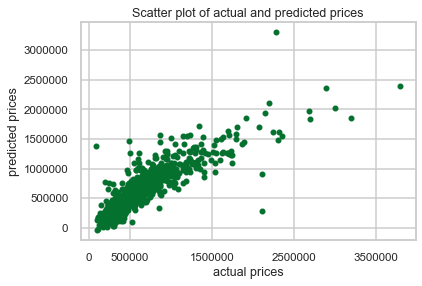

In [33]:
fig = plt.figure()
plt.scatter(y2_test_transformed, ridge_y_test_pred[7], s=20)
plt.title('Scatter plot of actual and predicted prices')
plt.xticks(ticks=[0,500000,1500000,2500000, 3500000])
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
#fig.savefig('scatter_true_pred.png')
plt.show()

We see in the above plot that the predicted prices are somewhat close to the actual prices, but not very close. The best case scenario would be for the scatter plots to follow a perfectly straight diagonal line, indicating that our model perfectly predicted the house prices.

Histogram of the residuals of the best performing ridge regression model

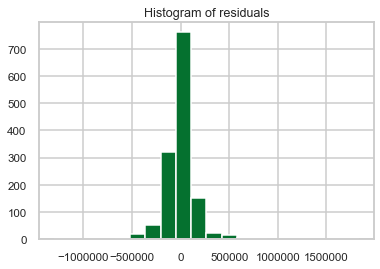

In [34]:
fig = plt.figure()
plt.hist(y2_test_transformed - ridge_y_test_pred[7], bins=20)
plt.title('Histogram of residuals')
#fig.savefig('hist_resid.png')
plt.show()

Ideally a residual histogram follows a normal distribution, and that tells us that we've chosen an appropriate model type. However, the above plot does not closely follow a normal distribution, which is an indication that either my models need improvemnt, or a regression model is not best fit for my data.

### Confidence Interval around my prediction accuracy

In [35]:
# RMSE == standard deviation of errors
ridge_test_error

{8: 22107.0,
 9: 6163.0,
 10: 3722.0,
 11: 3794.0,
 12: 11531.0,
 13: 6163.0,
 14: 3722.0,
 15: 3794.0}

In [36]:
# taking the model with the smallest error
one_sd = min(ridge_test_error.values())
two_sd = 2*one_sd
three_sd = 3*one_sd

#### 95% Confidence

In [37]:
min_error = 0 - two_sd
max_error = 0 + two_sd

print('I can be 95% confident that the error in the home price predictions will be '
      'between {} and {}.'.format(min_error, max_error))

I can be 95% confident that the error in the home price predictions will be between -7444.0 and 7444.0.


**What happens if my boss purchases 100 homes at my predicted price?**  
**What happens if my boss purchases 100 homes \\$1000 below my predicted prices?**

In [44]:
from math import sqrt

np.random.seed(47)
n = 100 # length of sample

# function to sample the actual and predicted prices of 100 homes at a time.
def draw_bs_reps(y_test, y_pred):
    bs_error = np.random.choice(y_test - y_pred, n) # price sold - price bought == profit (gain or loss)
    
    error_mean = np.sum(bs_error) / len(bs_error) # avg gain or loss on n transactions
    return error_mean

# running the same experiment as before, with $1000 deducted from my predicted prices
def draw_bs_reps_1000(y_test, y_pred):
    bs_error = np.random.choice(y_test - (y_pred-1000), n) # deduct 1000 from each predicted price
    
    error_mean = np.sum(bs_error) / len(bs_error) # avg gain or loss on n transactions
    return error_mean

In [46]:
# purchasing 100 homes at predicted price

error_means = np.array([draw_bs_reps(y2_test_transformed, ridge_y_test_pred[7]) for i in range(1000)]) # Ridge Reg model
error_means = np.round(error_means, 2)
error_means_mean = np.mean(error_means) # mean of means
print('mean of means: {}'.format(int(error_means_mean)))

error_means_std = sqrt(np.sum((error_means-error_means_mean)**2) / (1000-1)) # standard deviation of means
print('std of means: {}'.format(int(error_means_std)))

# confidence interval
min_error_100 = int(error_means_mean - 2*error_means_std)
max_error_100 = int(error_means_mean + 2*error_means_std)

print('')
print('The above result means that if I calculate the error between the true/historical price and my predicted price ' 
      'of 100 homes, I can be 95% confident that the error of the mean of average error in the home price ' 
      'predictions will be between {:,} and {:,}.'.format(min_error, max_error))
print('')
print('In other words, if my boss was to buy 100 homes at my predicted price and sell them at their true price, ' 
      'I can be 95% confident that the most she would lose is ${:,} ' 
      'and the most she would gain is ${:,}.'.format(-1*min_error_100, max_error_100))

mean of means: 3524
std of means: 18282

The above result means that if I calculate the error between the true/historical price and my predicted price of 100 homes, I can be 95% confident that the error of the mean of average error in the home price predictions will be between -7,444.0 and 7,444.0.

In other words, if my boss was to buy 100 homes at my predicted price and sell them at their true price, I can be 95% confident that the most she would lose is $33,040 and the most she would gain is $40,089.


-33040 40089


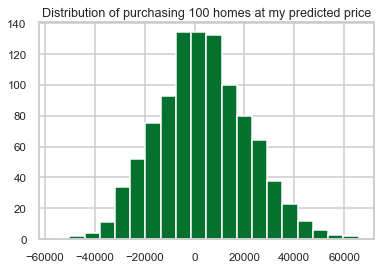

In [48]:
fig = plt.figure()
hist_100 = plt.hist(error_means, bins=20)
plt.title("Distribution of purchasing 100 homes at my predicted price")
plt.plot()
#fig.savefig('hist_100_homes.png')

print(min_error_100, max_error_100)

In [45]:
# purchasing 100 homes at 1000 less than predicted price

error_means_1000 = np.array([draw_bs_reps_1000(y2_test_transformed, ridge_y_test_pred[7]) for i in range(1000)]) # Ridge reg model
error_means_1000 = np.round(error_means, 2)
error_means_mean = np.mean(error_means_1000) # mean of means
print('mean of means: {}'.format(int(error_means_mean)))

error_means_std = sqrt(np.sum((error_means-error_means_mean)**2) / (1000-1)) # standard deviation of means
print('std of means: {}'.format(int(error_means_std)))

# confidence interval
min_error_1000 = int(error_means_mean - 2*error_means_std)
max_error_1000 = int(error_means_mean + 2*error_means_std)

print('')
print('If my boss was to buy 100 homes at $1000 less than my predicted price and sell them at their true price, ' 
      'I can be 95% confident that the most she would lose is ${:,} ' 
      'and the most she would gain is ${:,}.'.format(-1*min_error_1000, max_error_1000))

mean of means: 4339
std of means: 18435

If my boss was to buy 100 homes at $1000 less than my predicted price and sell them at their true price, I can be 95% confident that the most she would lose is $32,531 and the most she would gain is $41,209.


-32531 41209


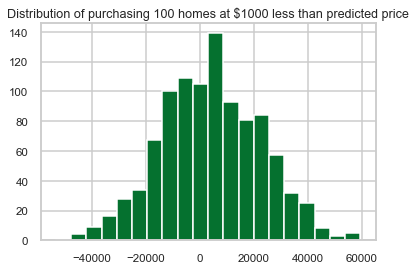

In [43]:
fig = plt.figure()
hist_100_1000 = plt.hist(error_means_1000, bins=20)
plt.title("Distribution of purchasing 100 homes at $1000 less than predicted price")
plt.plot()
#fig.savefig('hist_1000_homes.png')
print(min_error_1000, max_error_1000)